In [5]:
import json
from src import generate
import numpy as np


In [6]:
pw_path = './pw.json'
with open(pw_path) as f:
        data = f.read()
        input_parameters = json.loads(data)

In [7]:
# input_parameters

### Ecutwfc convergence test

In [8]:
ecutwfc = np.linspace(10,100,10,dtype=int)

input_parameters['system']['ecutrho']=""
file_names=[]
for i in ecutwfc:
    input_parameters['system']['ecutwfc']=i
    file_names.append(f"ecutwfc_{i}")
    generate.input(project_id="Graphene_ecutwfc",job_id=f"ecutwfc_{i}",config=input_parameters,calculation='scf',poscar="C.poscar",layer='mono')

In [9]:
generate.runner(project_name="Graphene_ecutwfc",iteration="ecutwfc",file_names=file_names,calculation="scf",qe_path='/usr/bin/',ncore=1)

In [15]:
import matplotlib.pyplot as plt

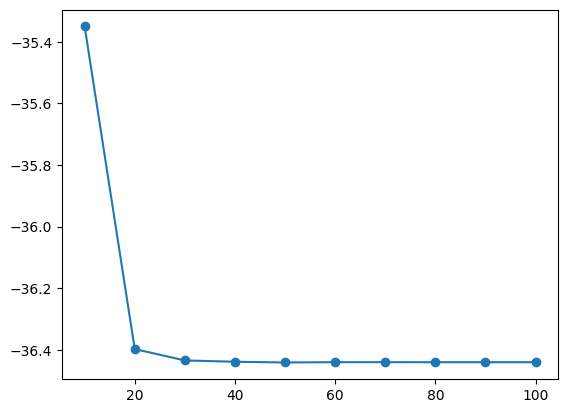

In [18]:
energies =[]
for e in ecutwfc:
    path=f"./Graphene_ecutwfc/ecutwfc_{e}/scf.out"
    en =utils.get_total_energy(path)
    energies.append(en)
    # print(e,en)
plt.plot(ecutwfc,energies,marker='o')
plt.show()
    

### Atomic distane convergence test

In [22]:
pw_path = './pw.json'
with open(pw_path) as f:
        data = f.read()
        input_parameters = json.loads(data)

In [27]:
distance = np.linspace(0.05,0.2,11)
distance = np.around(distance,2)
file_names=[]
for d in distance:
    file_names.append(f"distance_{d}")
    generate.input(project_id="Graphene_distance",
               config=input_parameters,
               job_id=f"distance_{d}",
               calculation='scf',
               atomic_positions=[['C','0','0','0'],
                                 ['C',f'{d}',f'{d}','0']],
               lattice_constant=[['10','0','0'],
                                 ['0','10','0'],
                                 ['0','0','10']])

In [28]:
generate.runner(project_name="Graphene_distance",iteration="distance",file_names=file_names,calculation="scf",qe_path='/usr/bin/',ncore=1)

In [31]:
energies

[0.05, 0.06, 0.08, 0.1, 0.11, 0.12, 0.14, 0.16, 0.17, 0.19, 0.2]

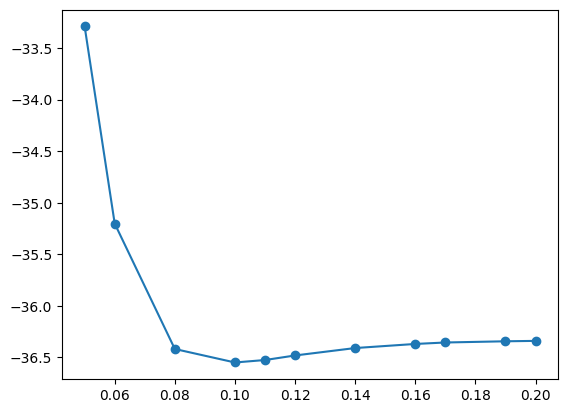

In [33]:
energies =[]
for e in distance:
    path=f"./Graphene_distance/distance_{e}/scf.out"
    en =utils.get_total_energy(path)
    energies.append(en)
    # print(e,en)
plt.plot(distance,energies,marker='o')
plt.show()
    